In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("2015 PISA Test.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [4]:
df.shape #after 70, the rows are empty

(1006, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 47.3+ KB


In [7]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [8]:
continent = df.groupby("Continent_Code").mean()
continent

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [11]:
continent = df.groupby("Continent_Code").median()
continent

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [12]:
continent = df.groupby("Continent_Code").std()
continent

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [13]:
continent = df.groupby("Continent_Code").var()
continent

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,53.249507,26.005030,62.677447,56.799679
AS,444.621918,4141.757822,3254.584049,3211.644321
EU,154.399841,1235.550805,1422.839540,1186.844969
OC,6.706475,0.880597,20.289087,5.476726
SA,95.500869,328.656783,388.471816,341.152678


In [14]:
continent = df.groupby("Continent_Code").skew()
continent

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:937: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.775229,0.144656,-0.099169,0.135810
EU,-0.049351,-1.245494,-1.325443,-0.881399
OC,NaN,NaN,NaN,NaN
SA,-1.469258,-0.372256,0.325499,-0.207071


In [15]:
math = df.groupby("Continent_Code").describe()["Math"]
math

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [16]:
reading = df.groupby("Continent_Code").describe()["Reading"]
reading

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,355.457400,7.916909,349.8593,352.658350,355.45740,358.256450,361.0555
AS,17.0,454.059682,57.048962,346.5490,408.102200,433.54230,508.690500,535.1002
EU,37.0,476.164608,37.720545,351.7415,452.514300,487.25010,499.814600,526.4247
OC,2.0,506.085650,4.504341,502.9006,504.493125,506.08565,507.678175,509.2707
SA,7.0,425.359229,19.709688,397.5414,416.126900,425.30310,431.922700,458.5709


In [17]:
science = df.groupby("Continent_Code").describe()["Science"]
science

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,381.074250,7.536556,375.7451,378.409675,381.07425,383.738825,386.4034
AS,17.0,467.945847,56.671371,386.4854,417.611200,456.48360,523.277400,555.5747
EU,37.0,478.299381,34.450616,383.6824,460.774900,490.22500,501.936900,534.1937
OC,2.0,511.648700,2.340241,509.9939,510.821300,511.64870,512.476100,513.3035
SA,7.0,421.747186,18.470319,396.6836,408.205450,424.59050,433.794600,446.9561


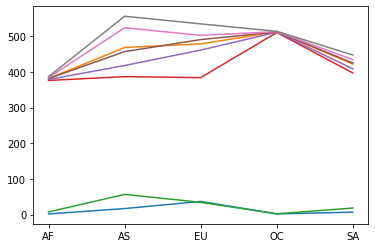

In [26]:
plt.plot(science);